In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data Samples
df_un = pd.read_csv("no_nudge.csv")
df_n = pd.read_csv("nudged.csv")

In [3]:
# Part I - Hypothesis I
# Control sample Pre-processing
df_un_f1 = df_un.drop(index=[0,1], columns=["StartDate","EndDate", "Status","Progress", "IPAddress", "Duration (in seconds)", "Finished", "RecordedDate", "ResponseId","RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Q3", "Q14","Q16","Q18","Q23","Q25"])
df_un_f2 = df_un_f1.reset_index()
df_un_f2['Q26'] = df_un_f2['Q26'].str.replace('Strongly agee', 'Strongly agree')
control = df_un_f2.drop(columns=["index"])

In [4]:
# Treatment Sample Pre-processing
df_n_f1 = df_n.drop(index=[0,1], columns=["StartDate","EndDate", "Status","Progress", "IPAddress", "Duration (in seconds)", "Finished", "RecordedDate", "ResponseId","RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Q2", "Q13","Q17","Q19","Q20","Q22"])
df_n_f2 = df_n_f1.reset_index()
treatment = df_n_f2.drop(columns=["index"])

In [5]:
sns.set_style("whitegrid")
sns.set_context("paper")

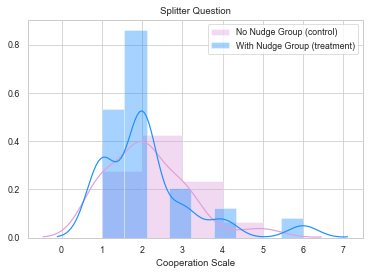

In [6]:
plt.title("Splitter Question")
sns.distplot(control["Q26"], color="plum", label="No Nudge Group (control)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q26"], color="dodgerblue", label="With Nudge Group (treatment)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('splitter.png')

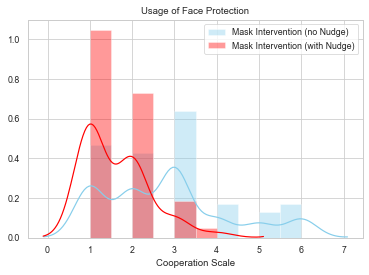

In [7]:
plt.title("Usage of Face Protection")
sns.distplot(control["Q2"] , color="skyblue", label="Mask Intervention (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q3"] , color="red", label="Mask Intervention (with Nudge)",  axlabel='Cooperation Scale')
plt.legend()
plt.savefig('face.png')

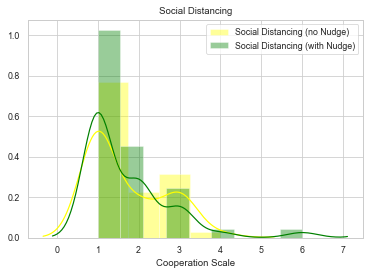

In [8]:
plt.title("Social Distancing")
sns.distplot(control["Q13"] , color="yellow", label="Social Distancing (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q14"] , color="green", label="Social Distancing (with Nudge)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('social.png')


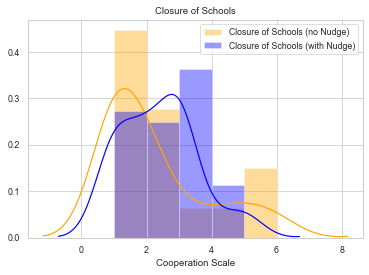

In [9]:
plt.title("Closure of Schools")
sns.distplot(control["Q17"] , color="orange", label="Closure of Schools (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q16"] , color="blue", label="Closure of Schools (with Nudge)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('closure.png')


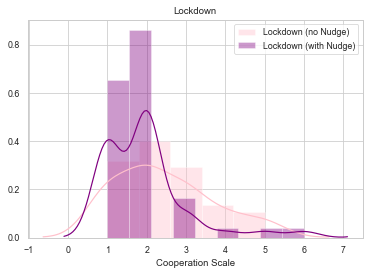

In [10]:
plt.title("Lockdown")
sns.distplot(control["Q19"] , color="pink", label="Lockdown (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q18"] , color="purple", label="Lockdown (with Nudge)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('lockdown.png')

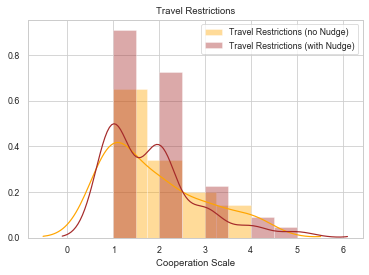

In [11]:
plt.title("Travel Restrictions")
sns.distplot(control["Q20"] , color="orange", label="Travel Restrictions (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q23"] , color="brown", label="Travel Restrictions (with Nudge)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('travel.png')

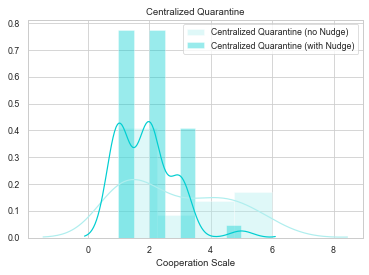

In [12]:
plt.title("Centralized Quarantine")
sns.distplot(control["Q22"] , color="paleturquoise", label="Centralized Quarantine (no Nudge)", axlabel='Cooperation Scale')
sns.distplot(treatment["Q25"] , color="darkturquoise", label="Centralized Quarantine (with Nudge)", axlabel='Cooperation Scale')
plt.legend()
plt.savefig('centralized.png')

In [13]:
#Means Control Group
control_means = control[["Q26","Q2", "Q13", "Q17", "Q19", "Q20", "Q22"]].astype("int").mean()
control_means

Q26    2.127660
Q2     2.787234
Q13    1.702128
Q17    2.255319
Q19    2.446809
Q20    1.872340
Q22    2.851064
dtype: float64

In [14]:
# Standard Deviations Control Group
control_stds = control[["Q26","Q2", "Q13", "Q17", "Q19", "Q20", "Q22"]].astype("int").std()
control_stds

Q26    0.991639
Q2     1.502696
Q13    0.906855
Q17    1.594394
Q19    1.230209
Q20    1.034556
Q22    1.667838
dtype: float64

In [15]:
#Means Treatment Group
treatment_means = treatment[["Q26","Q3", "Q14", "Q16", "Q18", "Q23", "Q25"]].astype("int").mean()
treatment_means

Q26    2.136364
Q3     1.613636
Q14    1.704545
Q16    2.386364
Q18    1.931818
Q23    1.818182
Q25    1.886364
dtype: float64

In [16]:
#Standard Deviations Treatment Group
treatment_stds = treatment[["Q26","Q3", "Q14", "Q16", "Q18", "Q23", "Q25"]].astype("int").std()
treatment_stds

Q26    1.192826
Q3     0.753778
Q14    1.047245
Q16    1.145586
Q18    1.065260
Q23    0.971039
Q25    0.894841
dtype: float64

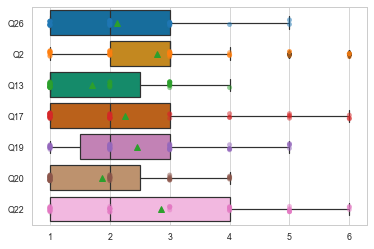

In [17]:
bplot = sns.stripplot(data=control, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,orient="h")
bp = sns.boxplot(data=control, palette="colorblind", orient="h", showmeans=True)


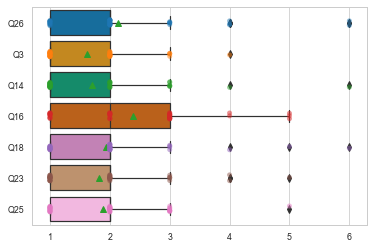

In [18]:
bplot_treatment = sns.stripplot( data=treatment, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5, orient="h")
bp_treatment = sns.boxplot(data=treatment, palette="colorblind", orient="h", showmeans=True)


In [19]:
# Mean Data Frame
statistics_mean = {"Control": [control_means["Q26"], control_means["Q2"], control_means["Q13"], control_means["Q17"], control_means["Q19"], control_means["Q20"], control_means["Q22"]],
                   "Treatment": [treatment_means["Q26"], treatment_means["Q3"], treatment_means["Q14"], treatment_means["Q16"], treatment_means["Q18"], treatment_means["Q23"], treatment_means["Q25"]]}
df_mean = pd.DataFrame (statistics_mean, columns = ["Control","Treatment"], index = ["Splitter Question", "Face Protection", "School Closure", "Travel Restrictions", "Social Distancing", "Lockdown", "Centralized Quarantine"])
df_mean

,Control,Treatment
Splitter Question,2.127660,2.136364
Face Protection,2.787234,1.613636
School Closure,1.702128,1.704545
Travel Restrictions,2.255319,2.386364
Social Distancing,2.446809,1.931818
Lockdown,1.872340,1.818182
Centralized Quarantine,2.851064,1.886364


In [20]:
# Standard Deviations Data Frame
statistics_stds = {"Control": [control_stds["Q26"], control_stds["Q2"], control_stds["Q13"], control_stds["Q17"], control_stds["Q19"], control_stds["Q20"], control_stds["Q22"]],
                   "Treatment": [treatment_stds["Q26"], treatment_stds["Q3"], treatment_stds["Q14"], treatment_stds["Q16"], treatment_stds["Q18"], treatment_stds["Q23"], treatment_stds["Q25"]]}
df_stds = pd.DataFrame (statistics_stds, columns = ["Control","Treatment"], index = ["Splitter Question", "Face Protection", "School Closure", "Travel Restrictions", "Social Distancing", "Lockdown", "Centralized Quarantine"])
df_stds

,Control,Treatment
Splitter Question,0.991639,1.192826
Face Protection,1.502696,0.753778
School Closure,0.906855,1.047245
Travel Restrictions,1.594394,1.145586
Social Distancing,1.230209,1.065260
Lockdown,1.034556,0.971039
Centralized Quarantine,1.667838,0.894841


In [21]:
# 2-sample T-test 
# Null Hypothesis:the means of each policy question (all the means) is equal, or oscillate by chance, in both, control and treatment, samples.
# Alternative Hypothesis: at least one of the means of all public policies is different,in both, control and treatment , samples.

from scipy.stats import ttest_ind
df_ttests = ttest_ind(control[["Q26","Q2", "Q13", "Q17", "Q19", "Q20", "Q22"]].astype("int"),treatment[["Q26","Q3", "Q14", "Q16", "Q18", "Q23", "Q25"]].astype("int"), equal_var = False)
t_test = pd.DataFrame(df_ttests, index = ["T-statistic","P-value"], columns = ["Splitter Question","Face Protection", "School Closure", "Travel Restrictions", "Social Distancing", "Lockdown", "Centralized Quarantine"] )
t_test

,Splitter Question,Face Protection,School Closure,Travel Restrictions,Social Distancing,Lockdown,Centralized Quarantine
T-statistic,-0.037716,4.753403,-0.011739,-0.452379,2.138552,0.257599,3.467915
P-value,0.970004,0.000011,0.990662,0.652168,0.035228,0.797311,0.000892


In [22]:
# Part II - Hypothesis II
# Control Pre-processing for correlation analysis (Method: Control Point Biserial Correlation -> Pearson's Coef.)
control['Sex'] = (control['Q8'] == 'Female').astype(int) # Female == 1 and Male == 0 transformation
control['Location'] = (control['Q9'] == 'Urban area').astype(int) # Urban == 1 and Rural == 0 transformation
control['Risk Group'] = (control['Q10'] == 'Yes').astype(int) # No == 0 and Yes == 1 transformation
score_control = control.drop(columns=["Q26", "Q7", "Q8", "Q9", "Q10", "Sex", "Location", "Risk Group"]) # Getting rid off unnecessary cols
score_control['Score']= score_control.astype(int).mean(axis=1) # Summing cooperation grades and giving an av. score per observation
score_control_cleaned = score_control.drop(columns=["Q2", "Q13", "Q17", "Q19", "Q20", "Q22"])
control_score = score_control_cleaned.join(other=control)

In [23]:
# Treatment Pre-processing for correlation analysis (Method: Control Point Biserial Correlation -> Pearson's Coef.)
treatment['Sex'] = (treatment['Q8'] == 'Female').astype(int) # Female == 1 and Male == 0 
treatment['Location'] = (treatment['Q9'] == 'Urban area').astype(int) # Urban == 1 and Rural == 0
treatment['Risk Group'] = (treatment['Q10'] == 'Yes').astype(int) # No == 0 and Yes == 1
score_treatment = treatment.drop(columns=["Q26", "Q7", "Q8", "Q9", "Q10"])
score_treatment['Score']= score_treatment.astype(int).mean(axis=1)
score_treatment_cleaned = score_treatment.drop(columns=["Q3", "Q14", "Q16", "Q18", "Q23", "Q25", "Sex", "Location", "Risk Group"])
treatment_score = score_treatment_cleaned.join(other=treatment)

In [24]:
# Renaming Cols
control_score.columns = ["Score","Splitter", "Face Protection", "Social Distancing", "School Closure", "Lockdown", "Travel Restrictions", "Centralized Quarantines", "Age Groups", 'Sex', "Location", "Risk Group", "Sex Binary", "Location Binary", "Risk Group Binary" ]
treatment_score.columns = ["Score","Splitter", "Face Protection", "Social Distancing", "School Closure", "Lockdown", "Travel Restrictions", "Centralized Quarantines", "Age Groups", 'Sex', "Location", "Risk Group", "Sex Binary", "Location Binary", "Risk Group Binary" ]

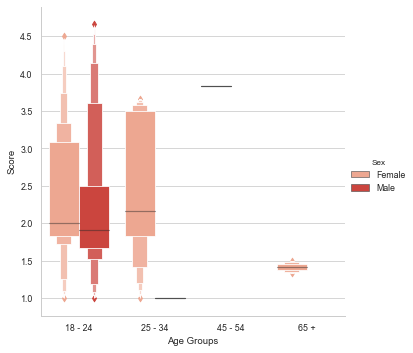

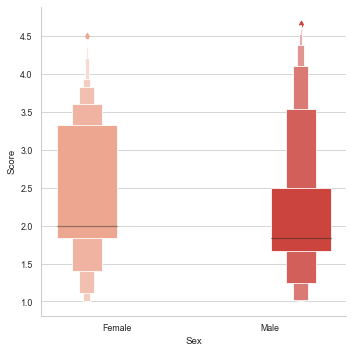

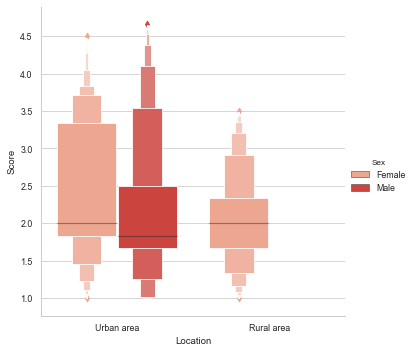

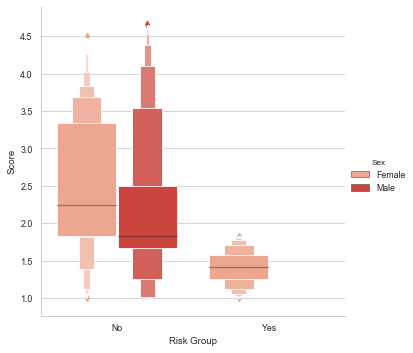

In [25]:
# Some categorical visualizations
# Control Group
cat = ["Age Groups", "Sex", "Location", "Risk Group"]
for i in cat: 
    control_four = sns.catplot(x=i, y="Score", hue="Sex" ,kind="boxen",palette="Reds", data=control_score);


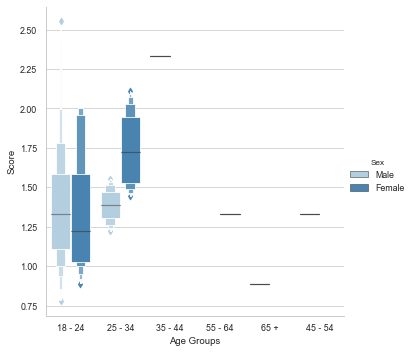

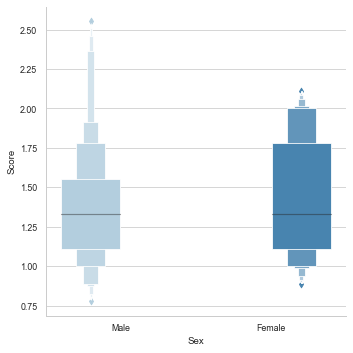

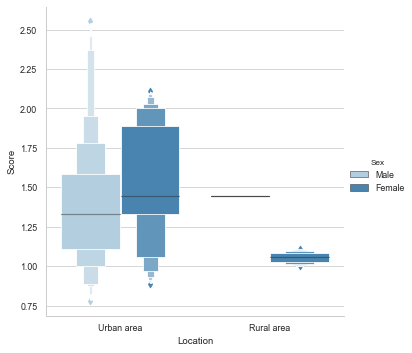

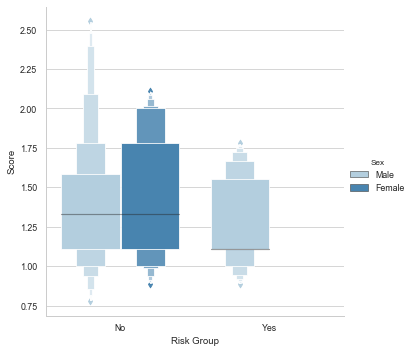

In [26]:
# Treatment Group
for i in cat: 
    treatment_four = sns.catplot(x=i, y="Score",hue="Sex", kind="boxen",data=treatment_score, palette="Blues");
    plt.savefig("treatment_four.png")

In [27]:
# Control Group Correlations
control_no_cat = control_score.drop(columns=["Age Groups", "Sex", "Location", "Risk Group", "Splitter","Face Protection", "Social Distancing", "School Closure", "Lockdown", "Travel Restrictions", "Centralized Quarantines"])
control_corr = control_no_cat.corr()
control_corr

,Score,Sex Binary,Location Binary,Risk Group Binary
Score,1.000000,0.077404,0.078010,-0.283977
Sex Binary,0.077404,1.000000,-0.284222,0.251243
Location Binary,0.078010,-0.284222,1.000000,0.105234
Risk Group Binary,-0.283977,0.251243,0.105234,1.000000


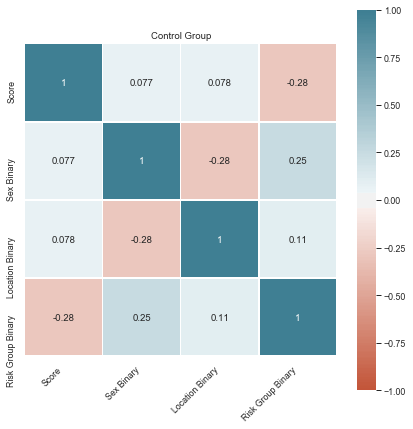

In [28]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(control_corr,vmin=-1, vmax=1, center=0,
    square=True, linewidths=.5, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Control Group")
ax.figure.savefig('control_heatmap.jpeg')

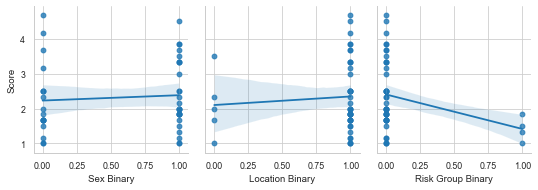

In [29]:
# Control Pairplots
control_pair = sns.pairplot(control_no_cat, x_vars=["Sex Binary", "Location Binary", "Risk Group Binary"],
                 y_vars=["Score"] ,kind="reg")
plt.savefig("control_pair.jpeg")

In [30]:
# Treatment Group Correlations
treatment_no_cat = treatment_score.drop(columns=["Age Groups","Sex","Location", "Risk Group", "Splitter","Face Protection", "Social Distancing", "School Closure", "Lockdown", "Travel Restrictions", "Centralized Quarantines", "Location", "Risk Group"])
treatment_corr = treatment_no_cat.corr()
treatment_corr

,Score,Sex Binary,Location Binary,Risk Group Binary
Score,1.000000,0.068013,0.155311,-0.112466
Sex Binary,0.068013,1.000000,-0.185897,-0.257513
Location Binary,0.155311,-0.185897,1.000000,0.096855
Risk Group Binary,-0.112466,-0.257513,0.096855,1.000000


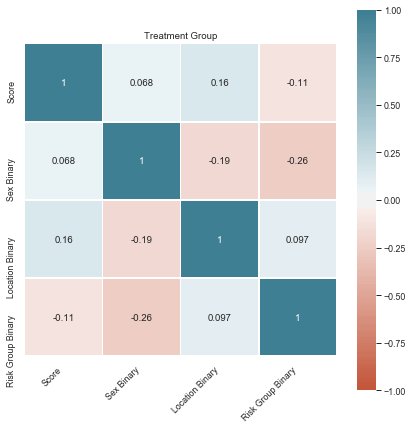

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(treatment_corr,vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Treatment Group")
ax.figure.savefig('treatment_heatmap.jpeg')

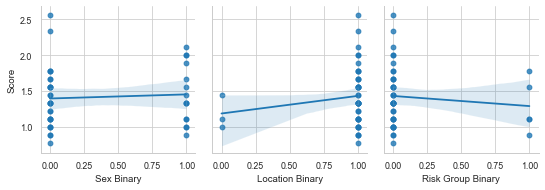

In [32]:
# Treatment Pairplots
treatment_pair = sns.pairplot(treatment_no_cat, x_vars=["Sex Binary", "Location Binary", "Risk Group Binary"],
                 y_vars=["Score"],kind="reg")
plt.savefig("treatment_pair.jpeg")

In [33]:
# ANOVA Testing Control
control_score.head()

,Score,Splitter,Face Protection,Social Distancing,School Closure,Lockdown,Travel Restrictions,Centralized Quarantines,Age Groups,Sex,Location,Risk Group,Sex Binary,Location Binary,Risk Group Binary
0,3.833333,2,5,3,2,4,4,5,18 - 24,Female,Urban area,No,1,1,0
1,2.500000,2,3,2,2,3,2,3,18 - 24,Male,Urban area,No,0,1,0
2,2.166667,2,6,1,1,2,1,2,25 - 34,Female,Urban area,No,1,1,0
3,2.500000,1,3,1,2,4,1,4,18 - 24,Male,Urban area,No,0,1,0
4,3.166667,5,6,3,2,3,2,3,18 - 24,Male,Urban area,No,0,1,0


In [34]:
# One-way ANOVA (Analysis of variance): Age Groups - Control Group
# H0: The mean of all age groups within the control population is equal, or vary by chance.
# Ha: At least one mean of all age groups differ within the control population.
from scipy import stats
F_control, p_control = stats.f_oneway(control_score[control_score["Age Groups"]=='18 - 24'].Score,
                      control_score[control_score["Age Groups"]=='25 - 34'].Score,
                      control_score[control_score["Age Groups"]=='45 - 54'].Score, 
                      control_score[control_score["Age Groups"]=='65 +'].Score)
F_control
#p_control

control_anova_dic = {"Control Group": [""],
                 "F-score": [F_control],
                 "P-value": [p_control]}
control_anova = pd.DataFrame(control_anova_dic)
control_anova
# -> p-value is bigger than the significance level of 5%, so we do not reject the null hypothesis.

,Control Group,F-score,P-value
0,,1.444782,0.243003


In [35]:
# One-way ANOVA (Analysis of variance): Age Groups - Treatment Group
# H0: The mean of all age groups within the treatment population is equal, or vary by chance.
# Ha: At least one mean of all age groups differ within the control population.

F_treatment, p_treatment = stats.f_oneway(treatment_score[treatment_score["Age Groups"]=='18 - 24'].Score,
                      treatment_score[treatment_score["Age Groups"]=='25 - 34'].Score,
                      treatment_score[treatment_score["Age Groups"]=='45 - 54'].Score, 
                      treatment_score[treatment_score["Age Groups"]=='65 +'].Score)
F_treatment
treatment_anova_dic = {"Treatment Group": [""],
                 "F-score": [F_treatment],
                 "P-value": [p_treatment]}
treatment_anova = pd.DataFrame(treatment_anova_dic)
treatment_anova
#p_treatment
# -> p-value is bigger than the significance level of 5%, so we do not reject the null hypothesis.

,Treatment Group,F-score,P-value
0,,1.407085,0.255642


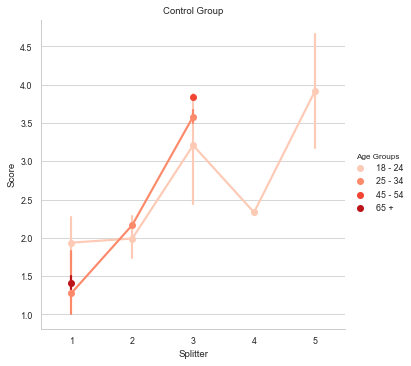

In [57]:
# Control Group Visualizations
control_anova = sns.catplot(x="Splitter",y="Score", data=control_score, hue="Age Groups", palette="Reds",kind="point")
plt.title("Control Group")
plt.savefig("control_anova.jpeg")

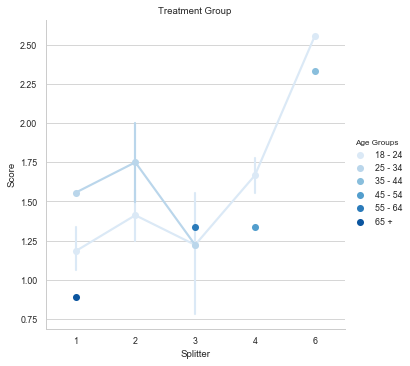

In [40]:
# Treatment Group Visualizations
treatment_anova = sns.catplot(x="Splitter", y="Sex", data=treatment_score, palette="Blues",kind="point",hue="Age Groups", hue_order=["18 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64","65 +"])
plt.title("Treatment Group")
plt.savefig("treatment_anova.jpeg")